In [1]:
import torch
import torch.nn as nn
import numpy as np
from matplotlib import pyplot as plt

In [2]:
layer_num = 5

In [3]:
MLP = torch.load("./Models/mlp_layer"+str(layer_num)+".pt").cpu()
simCLR = torch.load("./Models/simCLR_layer"+str(layer_num)+".pt").cpu()

In [4]:
MLP

MLP(
  (layers): ModuleList(
    (0): Linear(in_features=784, out_features=200, bias=True)
    (1): ReLU()
    (2): Linear(in_features=200, out_features=200, bias=True)
    (3): ReLU()
    (4): Linear(in_features=200, out_features=200, bias=True)
    (5): ReLU()
    (6): Linear(in_features=200, out_features=150, bias=True)
    (7): ReLU()
    (8): Linear(in_features=150, out_features=100, bias=True)
    (9): ReLU()
  )
  (classification): Classifier(
    (layers): ModuleList(
      (0): Linear(in_features=100, out_features=10, bias=True)
    )
  )
)

In [5]:
simCLR

FullMLP(
  (extractor): SimCLR(
    (baseModel): MLP_extractor(
      (layers): ModuleList(
        (0): Linear(in_features=784, out_features=200, bias=True)
        (1): ReLU()
        (2): Linear(in_features=200, out_features=200, bias=True)
        (3): ReLU()
        (4): Linear(in_features=200, out_features=200, bias=True)
        (5): ReLU()
        (6): Linear(in_features=200, out_features=150, bias=True)
        (7): ReLU()
        (8): Linear(in_features=150, out_features=100, bias=True)
      )
    )
  )
  (layers): ReLU()
  (classifier): Classifier(
    (layers): ModuleList(
      (0): Linear(in_features=100, out_features=10, bias=True)
    )
  )
)

In [6]:
adData_Test = np.load("./AdversarialSamples0/adversarialDataTest-25-model0.npy")
adData_Train= np.load("./AdversarialSamples0/adversarialDataTrian-25-model0.npy") 

In [7]:
Data_Test = np.load("./AdversarialSamples0/DataTest-25-model0.npy")
Data_Train= np.load("./AdversarialSamples0/DataTrian-25-model0.npy") 

In [8]:
adData_Test[0][0].shape

(28, 28)

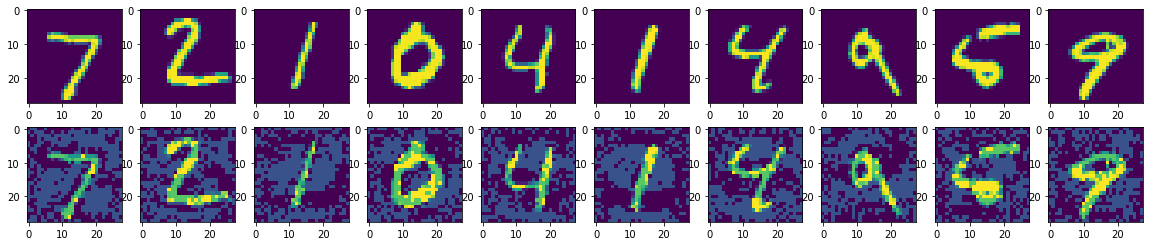

In [9]:
index=[1,3,16,12,2,35,18,15,17,19]
fig=plt.figure(figsize=(2*len(index),2*2))
axes=fig.subplots(2,len(index))
step=0
features=[]
for i in range(len(index)):
    axes[0][i].imshow(Data_Test[i])
    axes[1][i].imshow(adData_Test[i][0])
        #features.append(simCLR(sample[i]))
        #features.append(simCLR(adData[i]))
        # step+=1
        #axes[0][i].axis("off")
        #axes[1][i].axis("off")
plt.show()

In [10]:
#for name in simCLR.state_dict():
 #   print(name)

In [11]:
#params = {}

In [12]:
#for name,param in MLP.named_parameters():
 #   print(name, param)

In [13]:
MLP

MLP(
  (layers): ModuleList(
    (0): Linear(in_features=784, out_features=200, bias=True)
    (1): ReLU()
    (2): Linear(in_features=200, out_features=200, bias=True)
    (3): ReLU()
    (4): Linear(in_features=200, out_features=200, bias=True)
    (5): ReLU()
    (6): Linear(in_features=200, out_features=150, bias=True)
    (7): ReLU()
    (8): Linear(in_features=150, out_features=100, bias=True)
    (9): ReLU()
  )
  (classification): Classifier(
    (layers): ModuleList(
      (0): Linear(in_features=100, out_features=10, bias=True)
    )
  )
)

In [14]:
#MLP_extract_output = nn.Sequential(*list(MLP.children())[0])
#MLP_layer1 = nn.Sequential(list(MLP_extract_output.children())[0],list(MLP_extract_output.children())[1])
#MLP_layer2 = nn.Sequential(list(MLP_extract_output.children())[0],list(MLP_extract_output.children())[1],list(MLP_extract_output.children())[2],list(MLP_extract_output.children())[3])
#MLP_layer3 = nn.Sequential(list(MLP_extract_output.children())[0],list(MLP_extract_output.children())[1],list(MLP_extract_output.children())[2],list(MLP_extract_output.children())[3],list(MLP_extract_output.children())[4],list(MLP_extract_output.children())[5])

#MLP_layer4 = nn.Sequential(list(MLP_extract_output.children())[0],list(MLP_extract_output.children())[1],list(MLP_extract_output.children())[2],list(MLP_extract_output.children())[3],list(MLP_extract_output.children())[4],list(MLP_extract_output.children())[5], list(MLP_extract_output.children())[6],list(MLP_extract_output.children())[7])


In [15]:
MLP_extract_output = nn.Sequential(*list(MLP.children())[0])
for i in range (0,len(list(MLP_extract_output.children())),2):
    if i == 0:
        MLP_layer = nn.Sequential(list(MLP_extract_output.children())[i],list(MLP_extract_output.children())[i+1])
        torch.save(nn.Sequential(list(MLP_extract_output.children())[i],list(MLP_extract_output.children())[i+1]),"./Feature_model/MLP_Layer"+str(int(i/2))+".pt")

    else:
        torch.save(nn.Sequential(MLP_layer, list(MLP_extract_output.children())[i],list(MLP_extract_output.children())[i+1]),"./Feature_model/MLP_Layer"+str(int(i/2))+".pt")
        MLP_layer = nn.Sequential(MLP_layer, list(MLP_extract_output.children())[i],list(MLP_extract_output.children())[i+1])

In [16]:
len(list(MLP_extract_output.children()))

10

In [17]:
simCLR

FullMLP(
  (extractor): SimCLR(
    (baseModel): MLP_extractor(
      (layers): ModuleList(
        (0): Linear(in_features=784, out_features=200, bias=True)
        (1): ReLU()
        (2): Linear(in_features=200, out_features=200, bias=True)
        (3): ReLU()
        (4): Linear(in_features=200, out_features=200, bias=True)
        (5): ReLU()
        (6): Linear(in_features=200, out_features=150, bias=True)
        (7): ReLU()
        (8): Linear(in_features=150, out_features=100, bias=True)
      )
    )
  )
  (layers): ReLU()
  (classifier): Classifier(
    (layers): ModuleList(
      (0): Linear(in_features=100, out_features=10, bias=True)
    )
  )
)

In [18]:
#list(simCLR.children())[0]

In [19]:
#a = list(list(simCLR.children())[0].children())[0]

In [20]:
#list(list(list(SimCLR_extract_output.children())[0].children())[0].children())

In [21]:
#SimCLR_extract_output = list(simCLR.children())[0]
#SimCLR_layer1 = nn.Sequential(list(list(list(SimCLR_extract_output.children())[0].children())[0].children())[0],list(list(list(SimCLR_extract_output.children())[0].children())[0].children())[1])
#SimCLR_layer2 = nn.Sequential(list(list(list(SimCLR_extract_output.children())[0].children())[0].children())[0],list(list(list(SimCLR_extract_output.children())[0].children())[0].children())[1],list(list(list(SimCLR_extract_output.children())[0].children())[0].children())[2],list(list(list(SimCLR_extract_output.children())[0].children())[0].children())[3])
#SimCLR_layer3 = nn.Sequential(list(list(list(SimCLR_extract_output.children())[0].children())[0].children())[0],list(list(list(SimCLR_extract_output.children())[0].children())[0].children())[1],list(list(list(SimCLR_extract_output.children())[0].children())[0].children())[2],list(list(list(SimCLR_extract_output.children())[0].children())[0].children())[3],list(list(list(SimCLR_extract_output.children())[0].children())[0].children())[4],list(list(list(SimCLR_extract_output.children())[0].children())[0].children())[5])
#SimCLR_layer4 = nn.Sequential(list(list(list(SimCLR_extract_output.children())[0].children())[0].children())[0],list(list(list(SimCLR_extract_output.children())[0].children())[0].children())[1],list(list(list(SimCLR_extract_output.children())[0].children())[0].children())[2],list(list(list(SimCLR_extract_output.children())[0].children())[0].children())[3],list(list(list(SimCLR_extract_output.children())[0].children())[0].children())[4],list(list(list(SimCLR_extract_output.children())[0].children())[0].children())[5],list(list(list(SimCLR_extract_output.children())[0].children())[0].children())[6],list(simCLR.children())[1])

In [22]:
SimCLR_extract_output = list(simCLR.children())[0]
SimCLR_Layer_List = list(list(list(SimCLR_extract_output.children())[0].children())[0].children())
#SimCLR_layer1 = nn.Sequential(list(SimCLR_Layer_List)[0])
for i in range(0, len(SimCLR_Layer_List), 2):
    if i == 0:
        SimCLR_layer = nn.Sequential(SimCLR_Layer_List[i],SimCLR_Layer_List[i+1])
        torch.save(nn.Sequential(SimCLR_Layer_List[i],SimCLR_Layer_List[i+1]),"./Feature_model/SimCLR_Layer"+str(int(i/2))+".pt")

    elif i == (len(SimCLR_Layer_List)-1):
        torch.save(nn.Sequential(SimCLR_layer, SimCLR_Layer_List[i],list(simCLR.children())[1]),"./Feature_model/SimCLR_Layer"+str(int(i/2))+".pt")
        SimCLR_layer = nn.Sequential(SimCLR_layer, SimCLR_Layer_List[i],list(simCLR.children())[1])
    
    else:
        torch.save(nn.Sequential(SimCLR_layer, SimCLR_Layer_List[i],SimCLR_Layer_List[i+1]),"./Feature_model/SimCLR_Layer"+str(int(i/2))+".pt")
        SimCLR_layer = nn.Sequential(SimCLR_layer, SimCLR_Layer_List[i],SimCLR_Layer_List[i+1])

In [23]:
#layers_sum = int(len(list(MLP_extract_output.children()))/2)

# AdTest数据_SimCLR

In [24]:
adData_Test = torch.Tensor(adData_Test)

In [25]:
adData_Test.view(adData_Test.size(0), -1).size()

torch.Size([10000, 784])

In [26]:
Data_Test = torch.Tensor(Data_Test)/255

In [27]:
for i in range(layer_num):
    SimCLR_Layer_model = torch.load("./Feature_model/SimCLR_Layer"+str(i)+".pt")
    
    adtest_simclr_layer = SimCLR_Layer_model(adData_Test.view(adData_Test.size(0), -1))
    np.save("./AdTest_SimCLR_Layers"+str(layer_num)+"_output/Layer"+str(i)+".npy", adtest_simclr_layer.cpu().detach().numpy())
    
    test_simclr_layer = SimCLR_Layer_model(Data_Test.view(Data_Test.size(0), -1))
    np.save("./Test_SimCLR_Layers"+str(layer_num)+"_output/Layer"+str(i)+".npy", test_simclr_layer.cpu().detach().numpy())
    
    
    
    
    MLP_Layer_model = torch.load("./Feature_model/MLP_Layer"+str(i)+".pt")
    
    adtest_mlp_layer = MLP_Layer_model(adData_Test.view(adData_Test.size(0), -1))
    np.save("./AdTest_MLP_Layers"+str(layer_num)+"_output/Layer"+str(i)+".npy", adtest_mlp_layer.cpu().detach().numpy())
    
    test_mlp_layer = MLP_Layer_model(Data_Test.view(Data_Test.size(0), -1))
    np.save("./Test_MLP_Layers"+str(layer_num)+"_output/Layer"+str(i)+".npy", test_mlp_layer.cpu().detach().numpy())
    
    
    
    

In [28]:
#adtest_simclr_layer1 = SimCLR_layer1(adData_Test.view(adData_Test.size(0), -1))
#adtest_simclr_layer2 = SimCLR_layer2(adData_Test.view(adData_Test.size(0), -1))
#adtest_simclr_layer3 = SimCLR_layer3(adData_Test.view(adData_Test.size(0), -1))
#adtest_simclr_layer4 = SimCLR_layer4(adData_Test.view(adData_Test.size(0), -1))

In [29]:
#np.save("./AdTest_SimCLR_Layers_output/H_Layer1.npy", adtest_simclr_layer1.cpu().detach().numpy())
#np.save("./AdTest_SimCLR_Layers_output/H_Layer2.npy", adtest_simclr_layer2.cpu().detach().numpy())
#np.save("./AdTest_SimCLR_Layers_output/H_Layer3.npy", adtest_simclr_layer3.cpu().detach().numpy())
#np.save("./AdTest_SimCLR_Layers_output/H_Layer4.npy", adtest_simclr_layer4.cpu().detach().numpy())

# AdTest数据_MLP

In [30]:
#for i in range(layers_sum):
#    MLP_Layer_model = torch.load("./Feature_model/MLP_Layer"+str(i)+".pt")
#    adtest_mlp_layer = MLP_Layer_model(adData_Test.view(adData_Test.size(0), -1))
#    np.save("./AdTest_MLP_Layers_output/Layer"+str(i)+".npy", adtest_mlp_layer.cpu().detach().numpy())

In [31]:
#adtest_mlp_layer1 = MLP_layer1(adData_Test.view(adData_Test.size(0), -1))
#adtest_mlp_layer2 = MLP_layer2(adData_Test.view(adData_Test.size(0), -1))
#adtest_mlp_layer3 = MLP_layer3(adData_Test.view(adData_Test.size(0), -1))
#adtest_mlp_layer4 = MLP_layer4(adData_Test.view(adData_Test.size(0), -1))

In [32]:
#np.save("./AdTest_MLP_Layers_output/H_Layer1.npy", adtest_mlp_layer1.cpu().detach().numpy())
#np.save("./AdTest_MLP_Layers_output/H_Layer2.npy", adtest_mlp_layer2.cpu().detach().numpy())
#np.save("./AdTest_MLP_Layers_output/H_Layer3.npy", adtest_mlp_layer3.cpu().detach().numpy())
#np.save("./AdTest_MLP_Layers_output/H_Layer4.npy", adtest_mlp_layer4.cpu().detach().numpy())

# Test数据_SimCLR

In [33]:
#for i in range(layers_sum):
#    SimCLR_Layer_model = torch.load("./Feature_model/SimCLR_Layer"+str(i)+".pt")
    
    
#    test_simclr_layer = SimCLR_Layer_model(Data_Test.view(Data_Test.size(0), -1))
#    np.save("./Test_SimCLR_Layers_output/Layer"+str(i)+".npy", test_simclr_layer.cpu().detach().numpy())

In [34]:
#test_simclr_layer1 = SimCLR_layer1(Data_Test.view(Data_Test.size(0), -1))
#test_simclr_layer2 = SimCLR_layer2(Data_Test.view(Data_Test.size(0), -1))
#test_simclr_layer3 = SimCLR_layer3(Data_Test.view(Data_Test.size(0), -1))
#test_simclr_layer4 = SimCLR_layer4(Data_Test.view(Data_Test.size(0), -1))

In [35]:
#np.save("./Test_SimCLR_Layers_output/H_Layer1.npy", test_simclr_layer1.cpu().detach().numpy())
#np.save("./Test_SimCLR_Layers_output/H_Layer2.npy", test_simclr_layer2.cpu().detach().numpy())
#np.save("./Test_SimCLR_Layers_output/H_Layer3.npy", test_simclr_layer3.cpu().detach().numpy())
#np.save("./Test_SimCLR_Layers_output/H_Layer4.npy", test_simclr_layer4.cpu().detach().numpy())

# Test数据_MLP

In [36]:
#for i in range(layers_sum):
#    MLP_Layer_model = torch.load("./Feature_model/MLP_Layer"+str(i)+".pt")
#    test_mlp_layer = MLP_Layer_model(Data_Test.view(Data_Test.size(0), -1))
#    np.save("./Test_MLP_Layers_output/Layer"+str(i)+".npy", test_mlp_layer.cpu().detach().numpy())

In [37]:
#test_mlp_layer1 = MLP_layer1(Data_Test.view(Data_Test.size(0), -1))
#test_mlp_layer2 = MLP_layer2(Data_Test.view(Data_Test.size(0), -1))
#test_mlp_layer3 = MLP_layer3(Data_Test.view(Data_Test.size(0), -1))
#test_mlp_layer4 = MLP_layer4(Data_Test.view(Data_Test.size(0), -1))

In [38]:
#np.save("./Test_MLP_Layers_output/H_Layer1.npy", test_mlp_layer1.cpu().detach().numpy())
#np.save("./Test_MLP_Layers_output/H_Layer2.npy", test_mlp_layer2.cpu().detach().numpy())
#np.save("./Test_MLP_Layers_output/H_Layer3.npy", test_mlp_layer3.cpu().detach().numpy())
#np.save("./Test_MLP_Layers_output/H_Layer4.npy", test_mlp_layer4.cpu().detach().numpy())

In [39]:
#np.load("./AdTest_MLP_Layers_output/H_Layer4.npy")

In [40]:
#np.load("./AdTest_MLP_Layers_output/Layer3.npy")